In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../DASHBOARD/DATA/scraped_data.csv')

In [3]:
df.head()

,Price,Year,Bodytype,FuelType,Mil,Trim,Spoiler,Airconditioning,alarm,alloywheels,bumper,cdplayer,cruisecontrol,foglights,tripcomputer,immobilizer
0,"30,995",2018,Suv,Petrol,"12,537",2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,"31,998",2018,Suv,Petrol,"36,916",2.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0
2,"7,899",2010,Suv,Petrol,"154,398",3.2,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
3,"9,488",2011,Suv,Petrol,"104,278",2.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
4,"29,985",2018,Suv,Petrol,"55,284",2.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            1022 non-null   object 
 1   Year             1022 non-null   int64  
 2   Bodytype         974 non-null    object 
 3   FuelType         1022 non-null   object 
 4   Mil              1022 non-null   object 
 5   Trim             1022 non-null   float64
 6   Spoiler          488 non-null    float64
 7   Airconditioning  963 non-null    float64
 8   alarm            968 non-null    float64
 9   alloywheels      1015 non-null   float64
 10  bumper           88 non-null     float64
 11  cdplayer         786 non-null    float64
 12  cruisecontrol    1005 non-null   float64
 13  foglights        959 non-null    float64
 14  tripcomputer     960 non-null    float64
 15  immobilizer      970 non-null    float64
dtypes: float64(11), int64(1), object(4)
memory usage: 127.9+ KB


### When I scraped the data, I choose them like this:
- Take values of:
    - Price,
    - Year,
    - Bodytype,
    - FuelType,
    - Mi,
    - Trim
- And write 1 if other ones exist.
  
* **So Actually there is no any Null values. Null means that, this feature is not exist in this car.**
* **So I can fill Nulls with 0. In this way, I would have done them binary categorical variable.**

* But there is Null in "Bodytype" variable as seen. I should handle with this.

### And Actually first 6 variables should return numerical type.
### This is my other problem

In [5]:
df['Price'] = [i.replace(',', '') for i in df['Price']]
df['Price'] = df['Price'].astype(int)

df['Mil'] = [i.replace(',', '') for i in df['Mil']]
df['Mil'] = df['Mil'].astype(int)

# Bodytype variable is a categorical variable. So we should convert it a numerical type.
- There are 2 options:
  - Label Encoding
  - One hot encoding

- Actually we know by our daily routine that there is a ordered relation between bodytypes of cars.
- So one hot encoding is not a good option. We should use label encoding.

- But I dont like sklearn label encoding method. Because it encode levels of categorical labels by alphabetic order.
- I'll make my own encoder.

# of null values:  48
Suv            450
Sedan          442
Convertible     50
Hatchback       28
Wagon            4
Name: Bodytype, dtype: int64
Bodytype
Convertible    20718.620000
Hatchback      14517.928571
Sedan          23260.124434
Suv            31564.393333
Wagon           6620.250000
Name: Price, dtype: float64


<AxesSubplot:xlabel='Bodytype', ylabel='Price'>

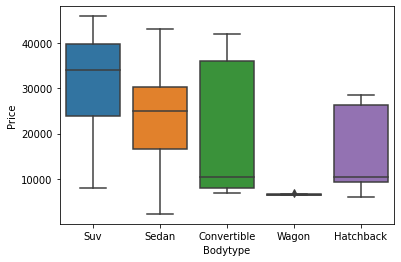

In [6]:
print('# of null values: ', df['Bodytype'].isna().sum())

print(df['Bodytype'].value_counts())

print(df.groupby('Bodytype')['Price'].mean())

sns.boxplot(data=df, x="Bodytype", y="Price")

In [7]:
def convertBodytype(type_):
    if type_ == "Wagon":
        return 0
    elif type_ == 'Hatchback':
        return 1
    elif type_ == 'Convertible':
        return 2
    elif type_ == 'Sedan':
        return 3
    elif type_ == 'Suv':
        return 4
df['Bodytype'] = df['Bodytype'].apply(lambda x: convertBodytype(x))

In [8]:
df['Bodytype'] = df['Bodytype'].fillna(4)

### Encoding Fueltype

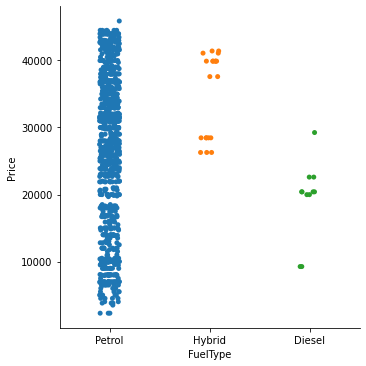

In [9]:
import seaborn as sns
sns.catplot(data=df, x="FuelType", y="Price")

## When I check Fueltype variable I can see that almost all cars' Fueltype is Petrol.
- We shoul label encode this variable, but I know that feature importance of this variable is so low, because there is no any meaningful difference between levels of the variable.
- I'll encode it but feature selection method'll tell me to drop it, I know.

In [10]:
def fuelType(type_):
    if type_ == 'Diesel':
        return 1
    elif type_ == 'Hybrid':
        return 2
    else:
        return 0

df['FuelType'] = df['FuelType'].apply(lambda x: fuelType(x))

In [11]:
df.isna().sum()

Price                0
Year                 0
Bodytype             0
FuelType             0
Mil                  0
Trim                 0
Spoiler            534
Airconditioning     59
alarm               54
alloywheels          7
bumper             934
cdplayer           236
cruisecontrol       17
foglights           63
tripcomputer        62
immobilizer         52
dtype: int64

Now all the Null variables are in binary variables. So as I said at the begining, this variables are about existing. So if they are null this mean we should fill them with 0

In [12]:
df = df.fillna(0)

In [13]:
# I think taking age of the cars is better option than taking it as year.
df['age'] = 2021 - df['Year']

In [14]:
# I wanna see the correlations of numerical variables

print(df[['Price', 'age', 'Bodytype', 'Mil', 'Trim']].corr())

             Price       age  Bodytype       Mil      Trim
Price     1.000000 -0.853818  0.417365 -0.749171  0.136711
age      -0.853818  1.000000 -0.345955  0.783788  0.074598
Bodytype  0.417365 -0.345955  1.000000 -0.102028  0.340801
Mil      -0.749171  0.783788 -0.102028  1.000000  0.244922
Trim      0.136711  0.074598  0.340801  0.244922  1.000000


In [15]:
y = df['Price']
X = df.drop(['Price', 'Year'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 29)


In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
Xrs = scaler.fit_transform(X_train)
Xrs = pd.DataFrame(Xrs, columns = X_train.columns)

Xts = scaler.transform(X_test)
Xts = pd.DataFrame(Xts, columns = X_train.columns)

In [17]:
print(Xts.head())

   Bodytype  FuelType       Mil      Trim  Spoiler  Airconditioning  alarm  \
0      0.75       0.0  0.119387  0.272727      0.0              1.0    1.0   
1      0.75       0.0  0.121674  0.727273      0.0              1.0    1.0   
2      0.75       0.0  0.044892  0.272727      1.0              1.0    1.0   
3      0.75       0.0  0.306786  0.181818      0.0              1.0    1.0   
4      0.75       0.0  0.119535  0.727273      0.0              1.0    1.0   

   alloywheels  bumper  cdplayer  cruisecontrol  foglights  tripcomputer  \
0          1.0     0.0       1.0            1.0        1.0           1.0   
1          1.0     0.0       1.0            1.0        1.0           1.0   
2          1.0     0.0       0.0            1.0        1.0           1.0   
3          1.0     0.0       1.0            1.0        1.0           1.0   
4          1.0     0.0       1.0            1.0        1.0           1.0   

   immobilizer       age  
0          1.0  0.166667  
1          1.0  0.16

In [18]:
rfr = RandomForestRegressor()
rfr.fit(Xrs, y_train)



RandomForestRegressor()

<AxesSubplot:>

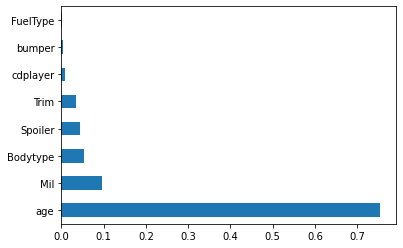

In [19]:

feature_imp = pd.Series(rfr.feature_importances_, index= X_train.columns)
feature_imp.nlargest(8).plot(kind='barh')

* First 5 ones are seem enough. First 5 ones seems like shows %95+ of the importances

In [20]:
scores = pd.DataFrame({
    'cols' : X_train.columns,
    'scores' : rfr.feature_importances_ 
})

scores.sort_values(by = 'scores', ascending = False, inplace = True)

In [21]:
list(scores['cols'][:5])

['age', 'Mil', 'Bodytype', 'Spoiler', 'Trim']

--------

## Actaully in this step generally there is no need to scale data again.
We can use this directly:
```python
Xts = Xts[list(scores['cols'][:5])]
Xrs = Xrs[list(scores['cols'][:5])]
```
* But I'll save my model and scaler as .sav file. 
* And scaler that we fit 10 steps before fed by 15 variable. And It wont work with directly these 5 features. Bc of this I'll fit scaler again by only 5 variable.

--------

In [22]:
X_train = X_train[list(scores['cols'][:5])]
X_test = X_test[list(scores['cols'][:5])]

scaler = MinMaxScaler(feature_range=(0,1))
Xrs = scaler.fit_transform(X_train)
Xrs = pd.DataFrame(Xrs, columns = X_train.columns)

Xts = scaler.transform(X_test)
Xts = pd.DataFrame(Xts, columns = X_train.columns)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
params = {
    'n_estimators': [10, 50, 100, 150, 200, 400, 600 ,1000],
    'max_features':[2, 3, 5, 7, 10, 12],
    'max_depth': [1, 2, 3, 4, 5, 8, 10 ,12],
}

gridy = GridSearchCV(RandomForestRegressor(),
                    params,
                    n_jobs=-1,
                    cv=5,
                    #verbose = 2
                )

In [25]:
gridy.fit(Xrs, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 8, 10, 12],
                         'max_features': [2, 3, 5, 7, 10, 12],
                         'n_estimators': [10, 50, 100, 150, 200, 400, 600,
                                          1000]})

In [26]:
print(gridy.best_params_)
print(gridy.best_score_)

{'max_depth': 12, 'max_features': 2, 'n_estimators': 600}
0.9680052672077517


In [27]:
rfr = RandomForestRegressor(max_depth= 12,
                            max_features = 2,
                            n_estimators = 600)

rfr.fit(Xrs, y_train)

RandomForestRegressor(max_depth=12, max_features=2, n_estimators=600)

In [28]:
preds = rfr.predict(Xts)
mean_squared_error(y_test, preds)

3798855.2175283097

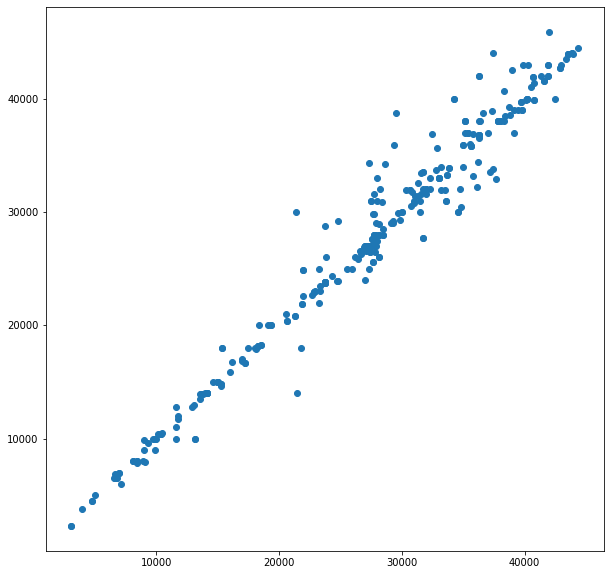

In [29]:
#px.scatter(x = preds, y= y_test)

plt.figure(figsize = (10,10))
plt.scatter(x= preds, y= y_test)

In [30]:
import pickle

In [31]:
pickle.dump(rfr, open('../REST/savFiles/basic_rfr_model.sav', 'wb'))
pickle.dump(scaler, open('../REST/savFiles/scaler.sav', 'wb'))